<a href="https://colab.research.google.com/github/IANGECHUKI176/deeplearning/blob/main/pytorch/gans/vanilla_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://arxiv.org/pdf/1406.2661.pdf

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import math
import numpy as np
import matplotlib.pyplot as plt


In [2]:
device  = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
latent_dim = 100
n_epochs = 200
batch_size = 64
b1 = 0.5
b2 = 0.999
channels = 1
sample_interval  = 400
image_size = 28
lr = 0.0002
display_step = 5000

In [3]:
image_shape = (channels,image_size,image_size)
np.prod(image_shape)

784

In [4]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()

        def block(in_feats,out_feats,normalize  = True):
            layers = [nn.Linear(in_feats,out_feats)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feats,0.8))
            layers.append(nn.LeakyReLU(0.2,inplace = True))
            return layers
        self.model = nn.Sequential(
            *block(latent_dim,128,normalize = False),
            *block(128,256),
            *block(256,512),
            *block(512,1024),
            nn.Linear(1024,int(np.prod(image_shape))),
            nn.Tanh()
        )
    def forward(self,x):
        out = self.model(x)
        out = out.view(out.size(0),*image_shape)
        return out

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()

        def block(in_feats, out_feats):
            layers = [nn.Linear(in_feats, out_feats)]
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers
        self.model = nn.Sequential(
            *block(int(np.prod(image_shape)),512),
            *block(512,256),
            *block(256,128),
            *block(128,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        out = x.view(x.size(0),-1)
        out = self.model(out)
        return out

In [6]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)


# Configure data loader

In [7]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [8]:
dataloader = DataLoader(
    dataset= datasets.MNIST('./root',
                            download = True,
                            train = True,
                            transform=transforms.Compose(
                            [transforms.Resize(image_size), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])),
    batch_size= batch_size,
    shuffle = True
)

#optimizers
optimizer_G = torch.optim.Adam(generator.parameters(),lr = lr ,betas=(b1,b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(),lr = lr,betas = (b1,b2))

#criterion
criterion = torch.nn.BCELoss()

100%|██████████| 9912422/9912422 [00:00<00:00, 173886377.68it/s]

Extracting ./root/MNIST/raw/train-images-idx3-ubyte.gz to ./root/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 18774906.05it/s]


Extracting ./root/MNIST/raw/train-labels-idx1-ubyte.gz to ./root/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45506770.17it/s]

Extracting ./root/MNIST/raw/t10k-images-idx3-ubyte.gz to ./root/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 6914892.47it/s]


Extracting ./root/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./root/MNIST/raw



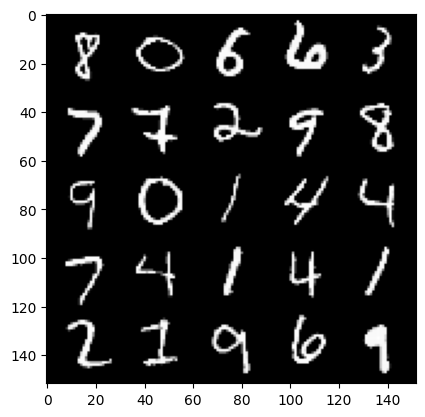

In [9]:
images,labels = next(iter(dataloader))
show_tensor_images(images)

In [10]:
z = torch.FloatTensor(np.random.normal(0,1,(images.size(0),latent_dim)))
z.shape
z.dtype

torch.float32

In [11]:
z = torch.normal(0,1,(images.size(0),latent_dim))
z.shape
z.dtype

torch.float32

# Training

In [12]:
valid = torch.FloatTensor(images.size(0),1).fill_(1.0).to(device)
valid.dtype

torch.float32

In [13]:
valid = torch.Tensor(images.size(0),1).fill_(1.0).to(device)
valid.dtype

torch.float32

In [14]:
from tqdm.auto import tqdm

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5, step 5000: Generator loss: 0.9472105810523049, discriminator loss: 0.5293392956614482


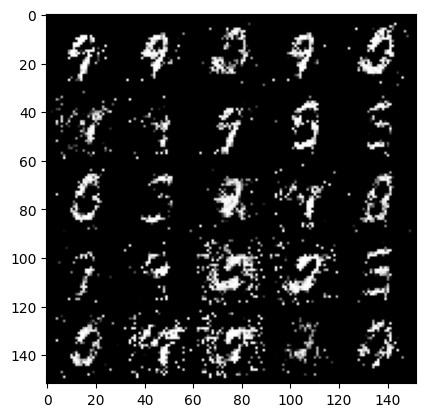

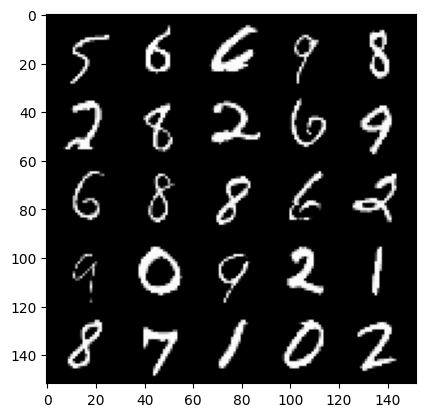

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 10, step 10000: Generator loss: 1.0048364551842228, discriminator loss: 0.531539954799412


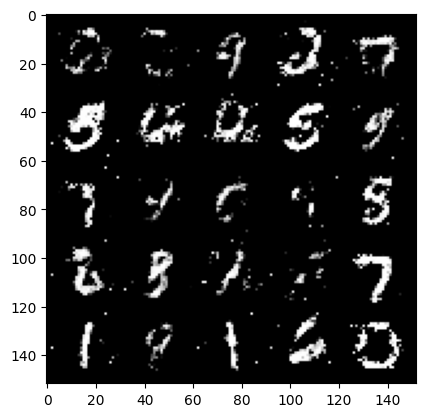

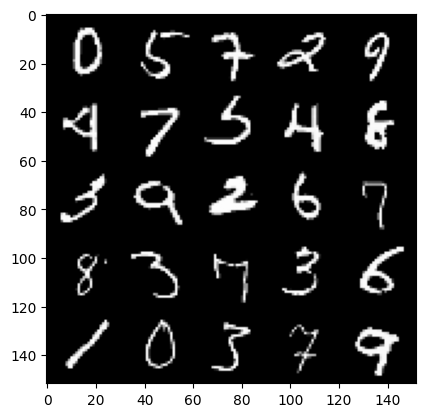

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 15, step 15000: Generator loss: 0.9918554867506051, discriminator loss: 0.5515295631349096


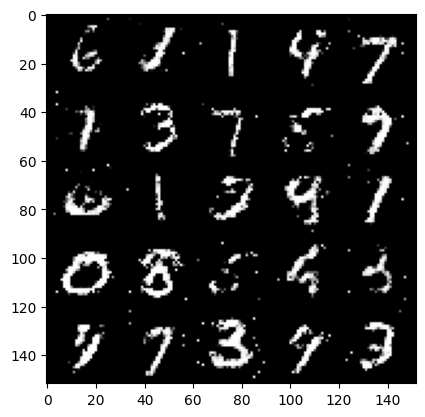

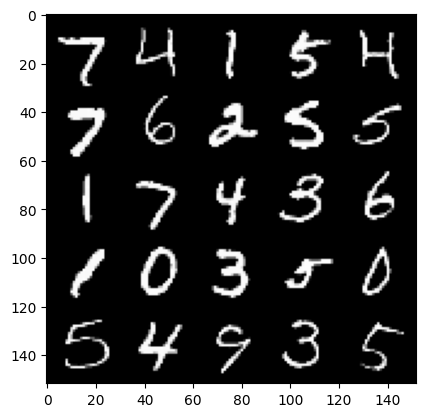

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 21, step 20000: Generator loss: 1.002651297354701, discriminator loss: 0.5567462705910208


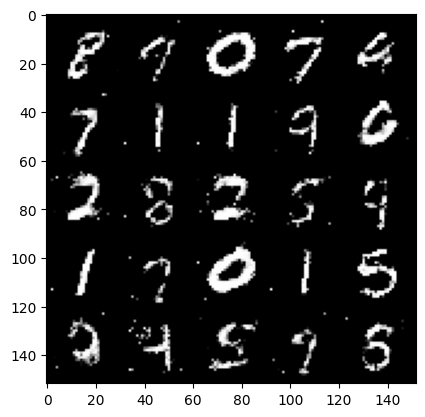

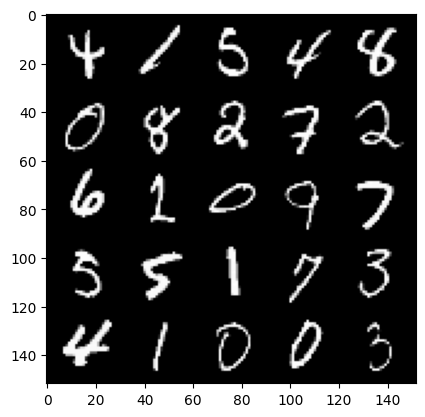

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 26, step 25000: Generator loss: 1.0084577659130096, discriminator loss: 0.5596828529179099


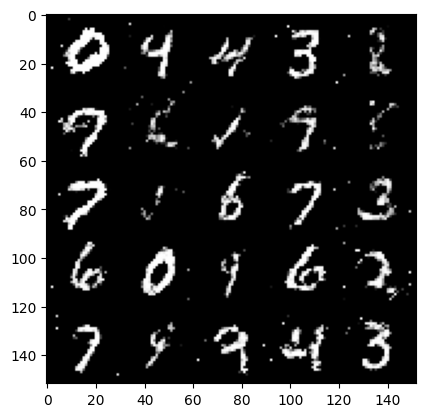

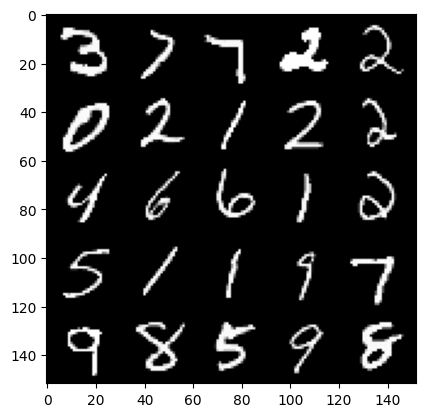

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 31, step 30000: Generator loss: 1.0271337363719932, discriminator loss: 0.555661511224509


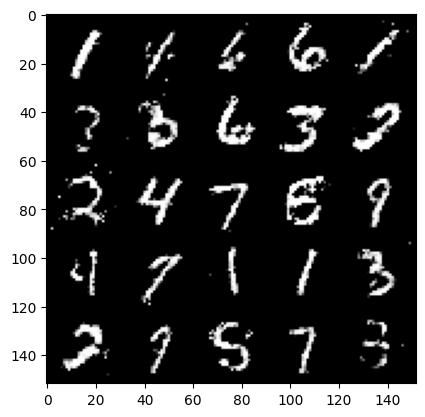

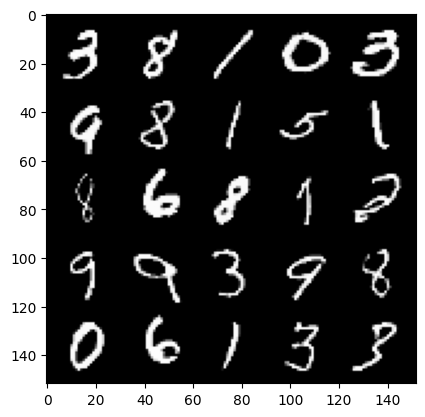

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 37, step 35000: Generator loss: 1.0334958914756796, discriminator loss: 0.5562872371912022


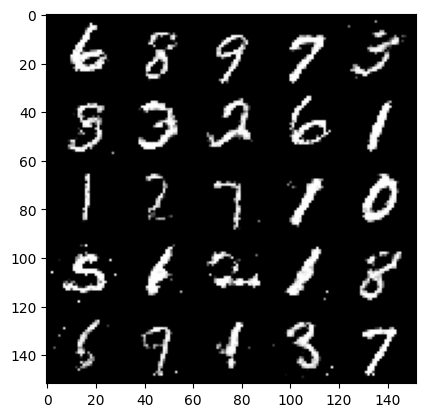

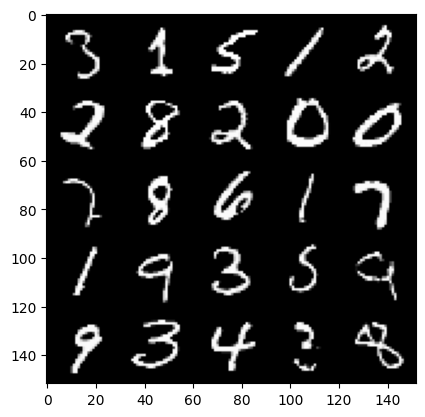

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 42, step 40000: Generator loss: 1.0309663524031643, discriminator loss: 0.5590228958845153


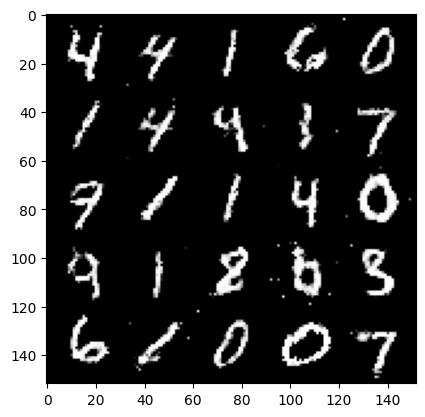

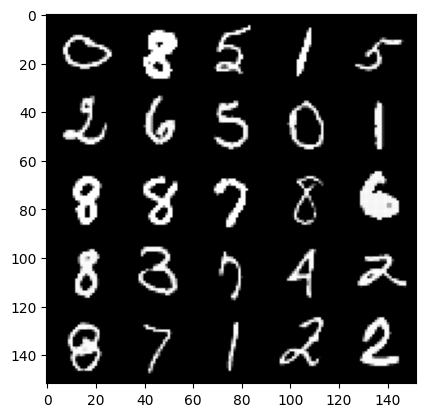

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 47, step 45000: Generator loss: 1.0347520739078522, discriminator loss: 0.5584507623910897


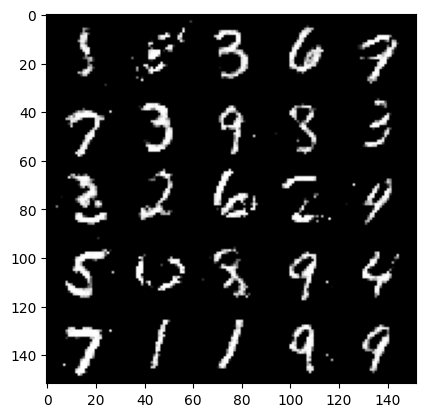

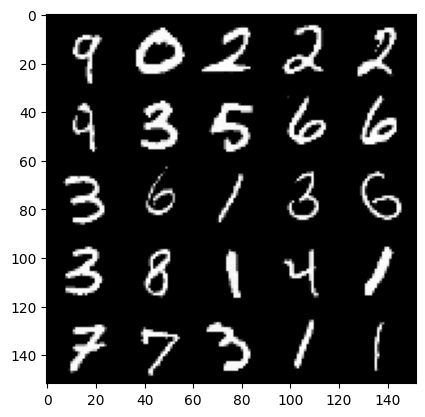

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 53, step 50000: Generator loss: 1.0347951262474078, discriminator loss: 0.5587085928857324


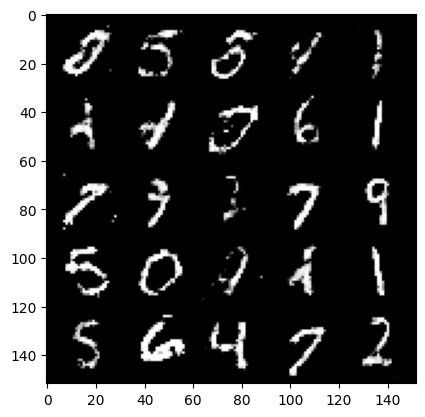

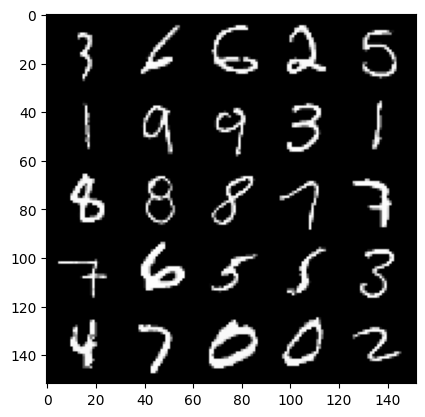

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 58, step 55000: Generator loss: 1.040007462322714, discriminator loss: 0.5575432342946541


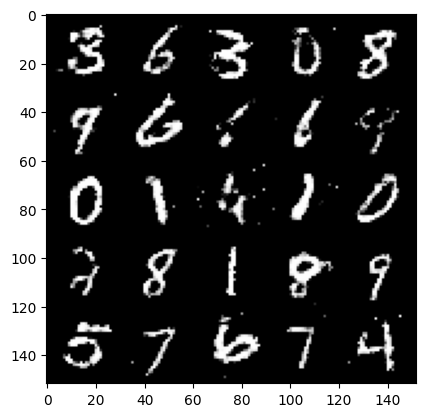

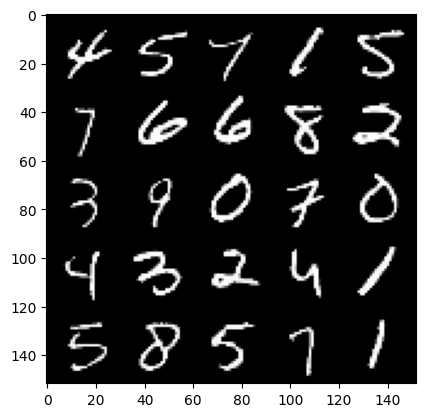

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 63, step 60000: Generator loss: 1.049700098836419, discriminator loss: 0.5540062961518765


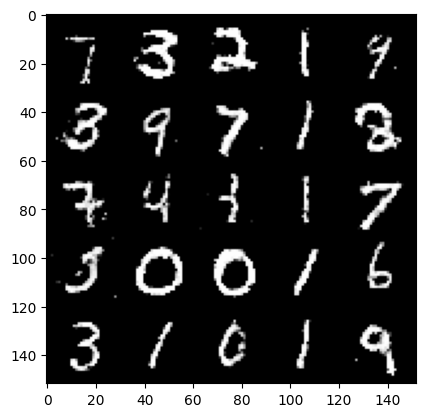

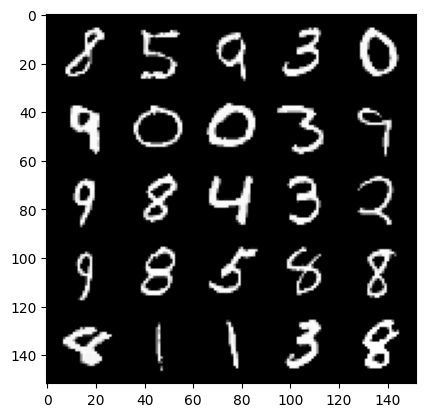

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 69, step 65000: Generator loss: 1.0567334563732138, discriminator loss: 0.5512300737023365


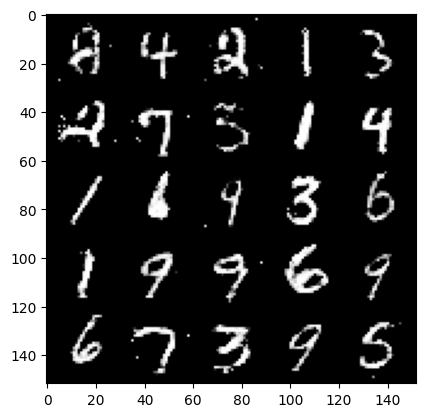

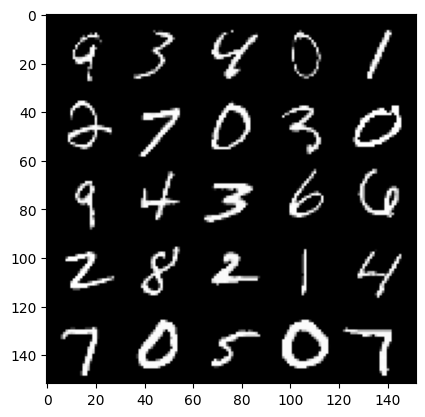

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 74, step 70000: Generator loss: 1.0612112586617444, discriminator loss: 0.5505831069231029


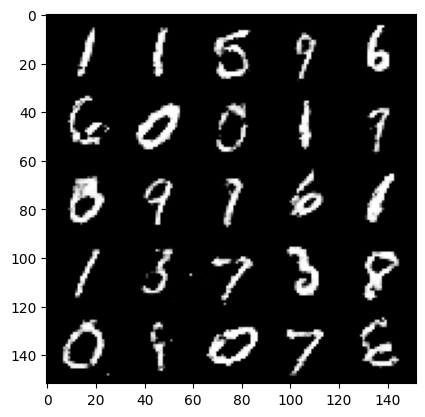

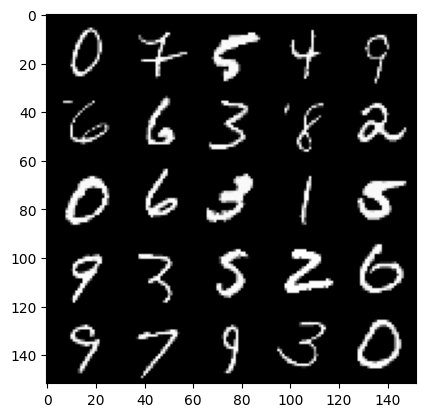

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 79, step 75000: Generator loss: 1.0634665579318987, discriminator loss: 0.5482047262072552


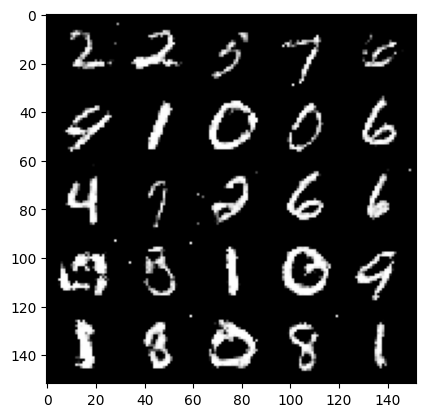

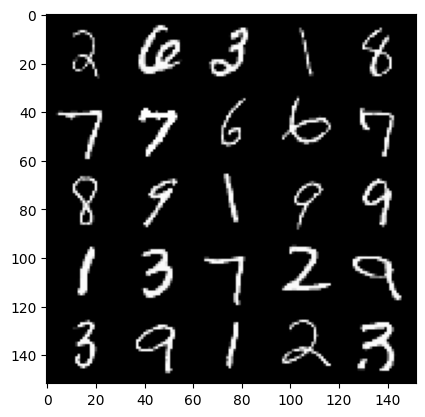

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 85, step 80000: Generator loss: 1.0664777235507965, discriminator loss: 0.5479777549982064


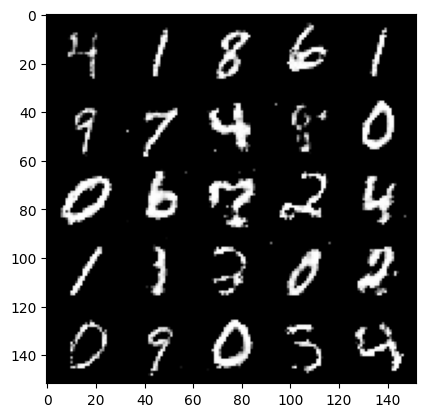

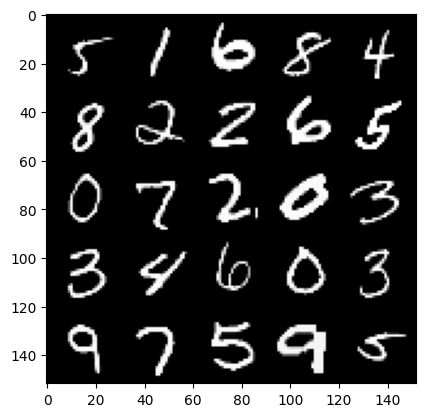

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 90, step 85000: Generator loss: 1.0659038445234283, discriminator loss: 0.5474682609856136


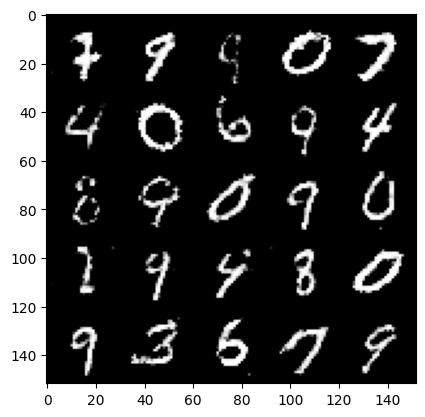

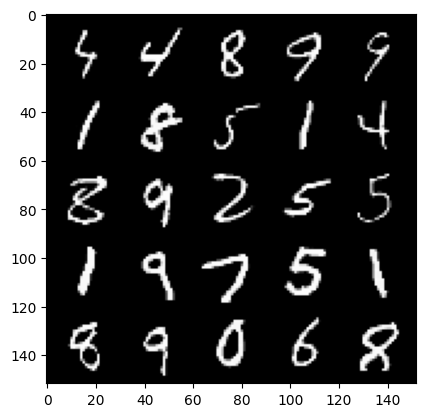

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 95, step 90000: Generator loss: 1.0688307874798781, discriminator loss: 0.5464612785696998


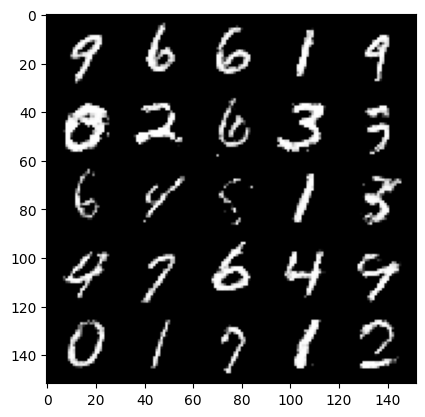

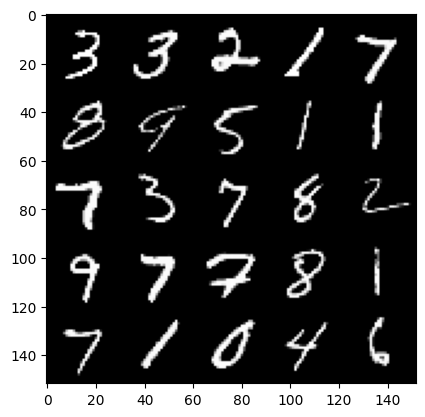

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 101, step 95000: Generator loss: 1.0728473437905324, discriminator loss: 0.5449174231588835


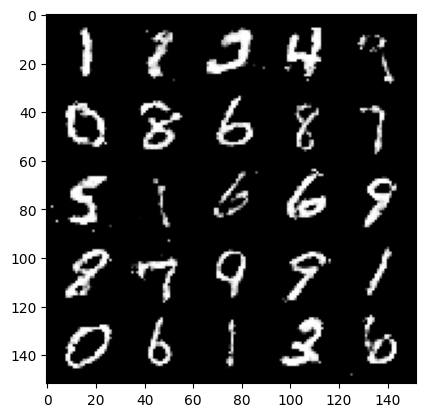

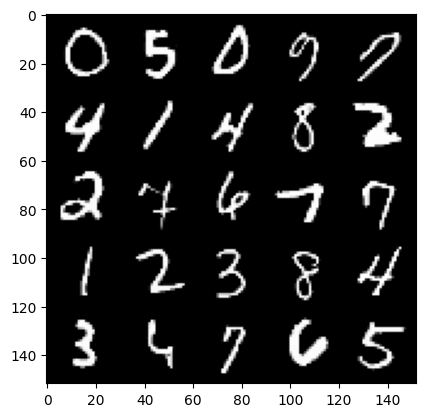

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 106, step 100000: Generator loss: 1.0697776816368125, discriminator loss: 0.5453457262635224


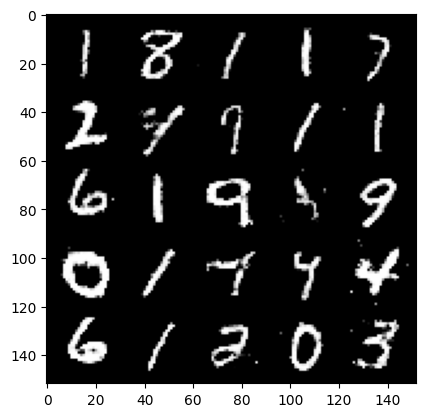

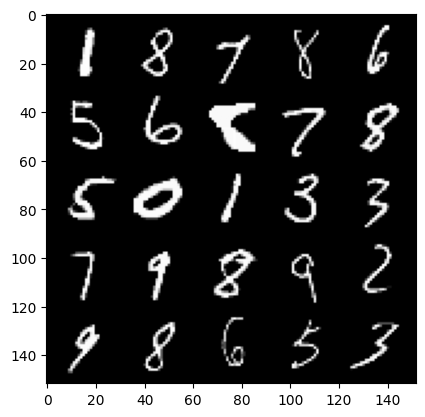

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 111, step 105000: Generator loss: 1.0767463474869727, discriminator loss: 0.5440616404116155


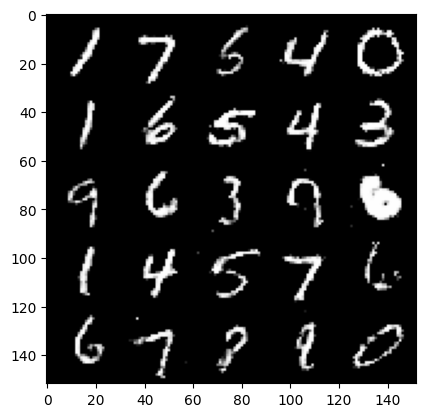

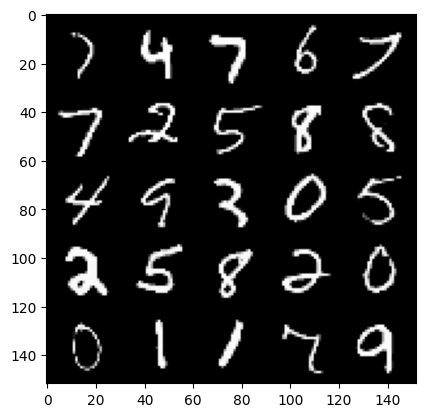

In [ ]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
for epoch in range(n_epochs):
    for imgs,labels in tqdm(dataloader):


        #adversarial ground truths
        valid = torch.ones(imgs.size(0),1).to(device) # torch.FloatTensor(imgs.size(0),1).fill_(1.0).to(device)
        fake = torch.zeros(imgs.size(0),1).to(device)

        #configure input
        real_imgs = imgs.to(device)

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Loss measures generator's ability to fool the discriminator
        z = torch.normal(0,1,(imgs.size(0),latent_dim)).to(device)

        # Generate a batch of images
        generated_imgs = generator(z)
        #show_tensor_images(generated_imgs)
        # Loss measures generator's ability to fool the discriminator
        g_loss = criterion(discriminator(generated_imgs),valid)

        g_loss.backward()

        optimizer_G.step()
        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()
        # Measure discriminator's ability to classify real from generated samples

        real_loss = criterion(discriminator(real_imgs),valid)
        fake_loss = criterion(discriminator(generated_imgs.detach()),fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()


        # Keep track of the average discriminator loss
        mean_discriminator_loss += d_loss.item() / display_step

        # Keep track of the average generator loss
        mean_generator_loss += g_loss.item() / display_step


        ### Visualization code ###
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Epoch {epoch}, step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")

            show_tensor_images(generated_imgs)
            show_tensor_images(real_imgs)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1